### If a cell begins with DNC: do not change it and leave the markdown there so I can expect a basic level of  organization that is common to all HW (will help me with grading). This also clearly delineates the sections for me

## DNC: preamble leave any general comments here and, in keeping with good practice, I suggest you load all needed modules in the preamble

## DNC: Begin Part 1

### Part 1: Data Visualization 

#### 1-1: Plotting x-y data

* Use the HCEPDB file to create a single 4x4 composite plot (_not 4 separate figures_).  The plots should contain the following data
    * Upper-left: PCE vs VOC
    * UR: PCE vs JCS
    * LL: E_HOMO vs VOC
    * LR: E_LUMO vs PCE 

* You should make the plots the highest quality possible and, in your judgement, ready for inclusion in a formal report or publication. 

* In the cell after you are finished making the plot add a markdown cell and add the following information 
    * There are five terms above from the HCEPDB that relate to photovoltaic materials - define them as they pertain to molecules that could be used for energy conversion applications 
    
    * Briefly explain the changes you made from the default plot and why you made them 
    
#### 1-2: Contour plotting 

* Use the ALA2fes.dat file to create a contour plot of the alanine dipeptide $\Phi$ vs $\Psi$ free-energy surface. Guidelines and information: 
    * The energy scale in the data input file is on kJ/mol and the free-energy surface (FES) was collected at a temperature of 300K: 
    * You should create a contour plot that draws contour lines spaced every kT in energy and stops drawing contours once all of the features can be clearly seen. 
        * This is a slightly different visualization than what we drew in class which used shaded coloring to draw the contours 
    * Annotate the cell so I can follow all the steps you are doing. The final energy plot need not be in kJ/mol (you can convert it to other energy or use units of kT if you prefer.
    


***
#### 1-1 Plotting x-y data

In [2]:
# Import commom data management and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
data=pd.read_csv('HCEPD_100K.csv', delimiter=',') # Read the csv file
# Assign variable to each columns in data
pce=data['pce']
voc=data['voc']
jsc=data['jsc']
e_homo=data['e_homo_alpha']
e_lumo=data['e_lumo_alpha']

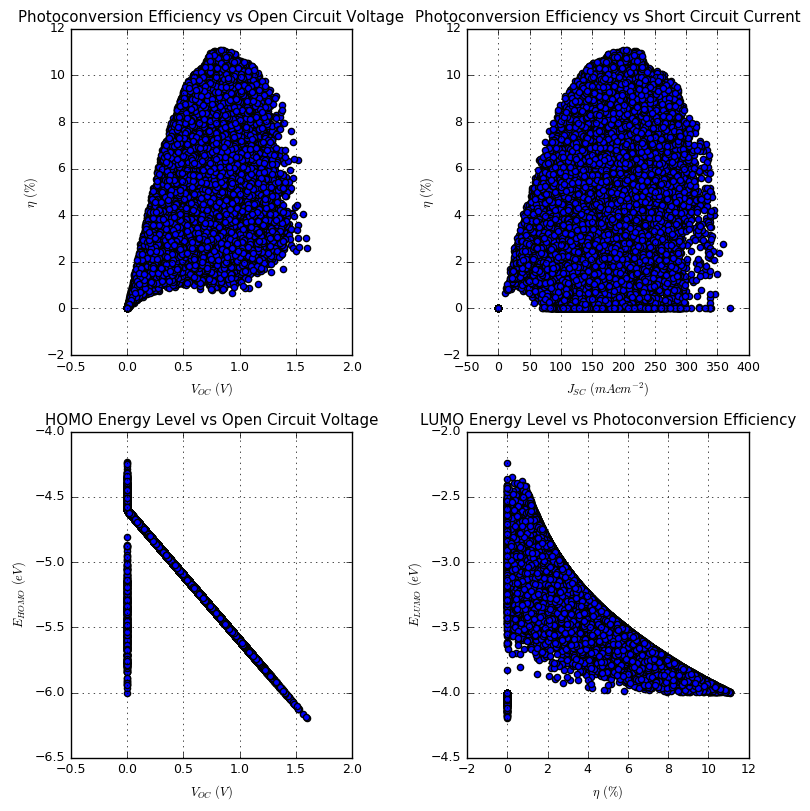

In [81]:
# Create a figure and adjust font size
fig=plt.figure(figsize=(8, 8))
plt.rcParams.update({'font.size': 9})

# Create the 1st subplot in the 2x2 composite figure
axes1 = plt.subplot(221)
axes1.scatter(voc,pce) # Create a scatter plot
axes1.set_title('Photoconversion Efficiency vs Open Circuit Voltage') # Title of the subplot
axes1.set_xlabel('$V_{OC}$ $(V)$') # x axis title of subplot
axes1.set_ylabel('$\eta$ $(\%)$') # y axis title of subplot
axes1.grid() # Add grid line to subplot

# Create the 2nd subplot in the 2x2 composite figure
axes2 = plt.subplot(222)
axes2.scatter(jsc,pce) # Create a scatter plot
axes2.set_title('Photoconversion Efficiency vs Short Circuit Current') # Title of the subplot
axes2.set_xlabel('$J_{SC}$ $(mA cm^{-2})$') # x axis title of subplot
axes2.set_ylabel('$\eta$ $(\%)$') # y axis title of subplot
axes2.grid() # add grid line to subplot

# Create the 3rd subplot in the 2x2 composite figure
axes3 = plt.subplot(223)
axes3.scatter(voc,e_homo) # Create a scatter plot
axes3.set_title('HOMO Energy Level vs Open Circuit Voltage') # Title of the subplot
axes3.set_xlabel('$V_{OC}$ $(V)$') # x axis title of subplot
axes3.set_ylabel('$E_{HOMO}$ $(eV)$') # y axis title of subplot
axes3.grid() # add grid line to subplot


# Create the 4th subplot in the 2x2 composite figure
axes4 = plt.subplot(224)
axes4.scatter(pce,e_lumo) # Create a scatter plot
axes4.set_title('LUMO Energy Level vs Photoconversion Efficiency') # Title of the subplot
axes4.set_xlabel('$\eta$ $(\%)$') # x axis title of subplot
axes4.set_ylabel('$E_{LUMO}$ $(eV)$') # y axis title of subplot
axes4.grid() # add grid line to subplot

# Adjust spacing between each subplots
plt.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)

***
#### Terminology
* PCE: "PCE" stands for photo conversion efficiency, which is defined as the ratio of the maximum energy output that can be obtained from the final products, hydrogen and oxygen, to the energy supplied in the form of light to produce them.[1] 

* VOC:"VOC" stands for open circuit voltage, which is the maximum voltage available from a solar cell, and this occurs at zero current. The open-circuit voltage corresponds to the amount of forward bias on the solar cell due to the bias of the solar cell junction with the light-generated current.[2]
* JSC: "JSC" represents the short circuit current, which is the current through the solar cell when the voltage across the solar cell is zero(i.e, when the solar cell is short circuited). [3]
* E_LUMO: "E-LUMO" represents the energy level of the lowest unoccupied molecular orbital.[4]
* E_HOMO: "E-HOMO" represents the energy level of the highest occupied molecular orbital.[4]

***
##### Citation
> <p style="font-style:italic">
> [1] Varghese, Oomman K., and Craig A. Grimes. "Appropriate strategies for determining the photoconversion efficiency of water photoelectrolysis cells: a review with examples using titania nanotube array photoanodes." Solar Energy Materials and Solar Cells 92.4 (2008): 374-384.
> </p>
> <p style="font-style:italic">
> [2] R. A. Sinton and Cuevas, A., “Contactless determination of current–voltage characteristics and minority-carrier lifetimes in semiconductors from quasi-steady-state photoconductance data”, Applied Physics Letters, vol. 69, pp. 2510-2512, 1996.
> </p>
> <p style="font-style:italic">
> [3] Short-Circuit Current | PVEducation http://www.pveducation.org/pvcdrom/short-circuit-current (accessed Jan 17, 2017).
> </p>
> <p style="font-style:italic">[4] Inadomi, Yuichi, et al. "Definition of molecular orbitals in fragment molecular orbital method." Chemical Physics Letters 364.1 (2002): 139-143.
> </p>

***
#### Modification to original plot

<p>
	First of all, instead of plotting four individual plots, I used the subplot feature to generate four composite plots which is easier to compare four sets of data. I labeled each subplots with the corresponding title to reflect relations between x-y axises. In addition, font size and padding between each subplots were modified in order to reduce the overlap between plots.
</p>
***

#### 1.2 Contour plotting

In [131]:
# Read the data file containing 5 columns and assign title for each column
contour=pd.read_csv('ALA2fes.dat', delim_whitespace=True, comment='#', names=['phi','psi','file.free','der_phi','der_psi'])

/Users/Ethan/miniconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return reshape(newshape, order=order)


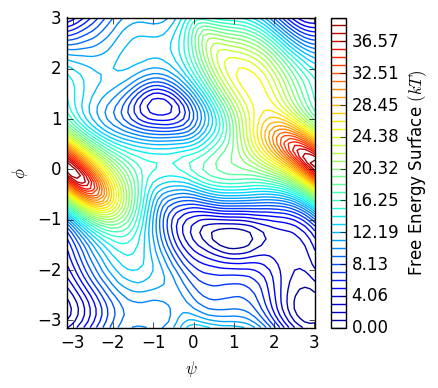

In [136]:
# Create a new matrix for contour plotting
N=50 
M=50

# Process data for contour plot
X=np.reshape(contour.psi,[N,M]) # Reshape X
Y=np.reshape(contour.phi,[N,M]) # Reshape Y
# Reshape Z and convert unit of free energy from kj/mol to kT
Z=np.reshape((contour['file.free']-contour['file.free'].min())/2.476,[N,M]) # 1kT=2.476kJ/mol @ 298K

space=1 # Spacing = 1 kT
lines=Z.max() # Maximum kT in Z direction
levels=np.linspace(0,lines*space,num=(lines+1),endpoint=True) # Create a evenly spaced energy level

# Create contour plot
fig=plt.figure(figsize=(4,4)) # Set plot size
plt.rcParams.update({'font.size': 12}) # Adjust font size
axes=fig.add_subplot(111) 
plt.contour(X,Y,Z, levels)
plt.colorbar().ax.set_ylabel('Free Energy Surface $(kT)$') # Create color bar with label
plt.xlabel('$\psi$') # Set x axis label
plt.ylabel('$\phi$') # Set y axis label

***
##### References
* Energy conversion
> <span style="font-style:italic;text-align:left"> Stuchebrukhov Group: Conversion Tables http://stuchebrukhov.ucdavis.edu/utilities/ConversionTables.html (accessed Jan 18, 2017).</span>
* Matplotlib
> <span style="font-style:italic;text-align:left"> Matplotlib Examples — Matplotlib 2.0.0 documentation http://matplotlib.org/examples/index.html (accessed Jan 18, 2017).</span>
***

## DNC: Begin Part 2

### Part 2: Molecular Visualization

#### 2-1: Molecules

* Use the program Avogadro to create a 3D visualization of the ALA2 molecule (_hint: I showed it in one of my lecture slides and labeled the relevant angles_) 

* Show the molecule frmo at least two orientations. 
* Embed the image in your notebook using markdown. Please use a local copy of the image so I can see the source file 

#### 2-2: Materials 

* Use the program Avogadro to create a 3D visualization of the unit cell of anatase titanium dioxide.  If possible create it in a slab form showing several unit cells in x/y plane 

* Embed the image in a markdown cell and write out a list of concise instructions in a numbered markdown list - it should be clear enough an undergrad science major can follow the instructions and succeed.